In [5]:
from typing import List

import pymc
import arviz
import pytensor.tensor as pt
from scipy.stats import kstest, lognorm, norm, beta, truncnorm, halfnorm, ks_1samp
import scipy.stats as stats

from typing import Any
from pymc.distributions.dist_math import check_parameters


import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from ipywidgets import FloatSlider, interactive, VBox, HBox, Checkbox, FloatText
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive
import plotly.figure_factory as ff
import pytensor.tensor as pt
from pytensor.scan import scan

from google.colab import output


import polars as pl
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score, mean_absolute_error

import plotly.graph_objects as go

ModuleNotFoundError: No module named 'google'

In [3]:
data_link = "./Data/data.csv"
df = pl.read_csv(data_link).with_columns(pl.col('week_start').cast(pl.Date)).sort('week_start')

df.head(4)

week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2
date,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64
2020-05-18,777,1304.227029,756.818857,1512.071585,297.193399,4593.059512,2020,21,1304.227029,756.818857,2300.295763,999.081772,82.890357,113,0.885456,0.464723,0.822984,-0.568065
2020-05-25,978,3000.504127,69.654279,399.82446,0.0,792.564928,2020,22,3000.504127,69.654279,4268.329032,637.97411,1246.32403,114,0.935016,0.354605,0.663123,-0.748511
2020-06-01,950,4609.816216,357.467625,471.992936,1769.420849,3281.127107,2020,23,4609.816216,357.467625,4219.098648,297.193399,1969.201111,115,0.970942,0.239316,0.464723,-0.885456
2020-06-08,800,3429.065037,425.663469,1181.626485,2353.024023,4510.560793,2020,24,3429.065037,425.663469,1512.071585,0.0,2889.605271,116,0.992709,0.120537,0.239316,-0.970942


In [4]:
target = 'new_customers'
date_col = 'week_start'
raw_regressors = ['promo_investment_lag0',
 'ppc_brand_investment_lag0',
 'ppc_generic_investment_lag3',
 'facebook_investment_lag2',
 'instagram_investment_lag6',
 'time',
 'sin_52_1',
 'cos_52_1',
 'sin_52_2',
 'cos_52_2']

Distribution plot code

In [8]:
alpha_widget = widgets.IntSlider(value=2,
    min=1,
    max=10,
    step=1,
    description='alpha')

beta_widget = widgets.IntSlider(value=2,
    min=1,
    max=10,
    step=1,
    description='beta')

def plot_beta_distribution(alpha, beta_param):

    # Calculate mean and standard deviation
    mean = alpha / (alpha + beta_param)
    std_dev = np.sqrt((alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1)))

    # Generate x values
    x = np.linspace(0, 1, 500)

    # Generate PDF and CDF values
    pdf_values = beta.pdf(x, alpha, beta_param)
    cdf_values = beta.cdf(x, alpha, beta_param)

    # Create the figure with both plots
    fig = go.Figure()

    # Add the PDF plot
    fig.add_trace(go.Scatter(
        x=x, y=pdf_values,
        mode='lines',
        name='PDF',
        line=dict(color='blue'),
        fill='tozeroy',
        hovertemplate='x: %{x:.2f}PDF: %{y:.2f}'
    ))

    # Add the CDF plot
    fig.add_trace(go.Scatter(
        x=x, y=cdf_values,
        mode='lines',
        name='CDF',
        line=dict(color='orange', dash='dot'),
        hovertemplate='x: %{x:.2f}CDF: %{y:.2f}'
    ))

    # Add annotations for mean and std deviation
    fig.add_trace(go.Scatter(
        x=[mean], y=[beta.pdf(mean, alpha, beta_param)],
        mode='markers+text',
        name='Mean',
        text=[f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}"],
        textposition='top right',
        marker=dict(color='red', size=10)
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Beta Distribution (\u03B1={alpha}, \u03B2={beta_param})",
        xaxis_title="x",
        yaxis_title="Density / Cumulative Probability"
    )

    # Show the plot
    fig.show()

# Example usage
#plot_beta_distribution(alpha=2, beta_param=5)

In [10]:
plot_beta_distribution(alpha=2, beta_param=5)

In [14]:
std_half_widget = widgets.FloatSlider(
    value=1, min=0.01, max=10, step=0.1, description="Std Dev"
)

def plot_halfnormal_distribution(std: float):
    std = np.round(std, 2)
    if std <= 0:
        raise ValueError("Standard deviation must be positive.")

    # Define the x range (only positive side for Half-Normal)
    x = np.linspace(0, 4 * std, 500)

    # Calculate PDF and CDF using scipy.stats.halfnorm
    pdf = halfnorm.pdf(x, scale=std)
    cdf = halfnorm.cdf(x, scale=std)

    # Create the plotly figure
    fig = go.Figure()

    # Add PDF to the plot
    fig.add_trace(
        go.Scatter(
            x=x, y=pdf, mode="lines", name="PDF",
            line=dict(color="blue"),
            fill="tozeroy",
            hovertemplate="PDF: %{y:.4f}X: %{x:.2f}",
        )
    )
    # Add CDF to the plot
    fig.add_trace(
        go.Scatter(
            x=x, y=cdf, mode="lines", name="CDF",
            line=dict(color="green", dash="dash"),
            hovertemplate="CDF: %{y:.4f}X: %{x:.2f}",
        )
    )

    # Add annotations for mean and std deviation
    mean = std * np.sqrt(2 / np.pi)  # Mean of the Half-Normal distribution
    fig.add_trace(
        go.Scatter(
            x=[mean],
            y=[halfnorm.pdf(mean, scale=std)],
            mode="markers",
            name="Mean",
            marker=dict(color="red", size=10, symbol="x"),
            hovertemplate=f"Mean: {mean:.4f}",
        )
    )

    # Update layout
    fig.update_layout(
        title=f"Half-Normal Distribution (std={std})",
        xaxis_title="X",
        yaxis_title="Density",
        legend=dict(title="Legend", orientation="h", y=-0.2),
        template="plotly_white"
    )

    # Show the plot
    fig.show()

In [15]:
plot_halfnormal_distribution(0.5)

In [16]:
# Widgets for Mean & Standard Deviation
mean_widget = FloatSlider(value=0, min=-1, max=1, step=0.1, description="Mean")
std_widget = FloatSlider(value=1, min=0.1, max=10, step=0.1, description="Std Dev")

# Widgets for Lower & Upper Bounds (Truncation)
lower_bound_widget = FloatText(value=None, placeholder="Lower Bound", description="Lower")
upper_bound_widget = FloatText(value=None, placeholder="Upper Bound", description="Upper")

# Checkbox to Enable/Disable Truncation
truncated_widget = Checkbox(value=False, description="Truncated")

# Function to Plot Normal & Truncated Normal Distributions
def plot_normal_distribution(mean, std, lower=None, upper=None, truncated=False):
    mean = np.round(mean, 2)
    std = np.round(std, 2)

    # Define x range for plotting
    x_min, x_max = mean - 4 * std, mean + 4 * std

    if truncated:
        if lower is not None:
            x_min = max(x_min, lower - 1)
        if upper is not None:
            x_max = min(x_max, upper + 1)

    x = np.linspace(x_min, x_max, 1000)

    if truncated and (lower is not None or upper is not None):
        # Truncated Normal Distribution
        a, b = -np.inf, np.inf
        if lower is not None:
            a = (lower - mean) / std
        if upper is not None:
            b = (upper - mean) / std

        pdf_values = truncnorm.pdf(x, a, b, loc=mean, scale=std)
        cdf_values = truncnorm.cdf(x, a, b, loc=mean, scale=std)  # ✅ Corrected CDF
        title = "Truncated Normal Distribution"
    else:
        # Regular Normal Distribution
        pdf_values = norm.pdf(x, loc=mean, scale=std)
        cdf_values = norm.cdf(x, loc=mean, scale=std)  # ✅ Corrected CDF
        title = "Normal Distribution"

    # Create Figure
    fig = go.Figure()

    # Add PDF (Probability Density Function)
    fig.add_trace(go.Scatter(x=x, y=pdf_values, mode="lines", name="PDF", fill="tozeroy",
                             line=dict(color="blue"), opacity=0.5))

    # Add CDF (Cumulative Distribution Function)
    fig.add_trace(go.Scatter(x=x, y=cdf_values, mode="lines", name="CDF",
                             line=dict(color="green", dash="dash")))

    # Add Mean Marker
    fig.add_trace(go.Scatter(x=[mean], y=[max(pdf_values)], mode="markers",
                             name="Mean", marker=dict(color="red", size=10, symbol="x")))

    # Update Layout (Fixed Y-axis at 1)
    fig.update_layout(
        title=title + f" (mean={mean}, std={std})",
        xaxis_title="Value",
        yaxis_title="Density",
        yaxis=dict(range=[0, 2.3]),  # Fixed y-axis for better comparison
        legend=dict(title="Legend", orientation="h", y=-0.2),
        width=1300, height=600
    )

    fig.show()

In [17]:
plot_normal_distribution(mean = 1, std =0.2, lower=None, upper=None, truncated=False)

In [18]:
interactive_beta_plot = interactive(
    plot_beta_distribution,
    alpha=alpha_widget,
    beta_param=beta_widget,
)

display(interactive_beta_plot)

interactive(children=(IntSlider(value=2, description='alpha', max=10, min=1), IntSlider(value=2, description='…

In [19]:
interactive_halfnormal_plot = interactive(
    plot_halfnormal_distribution,
    std=std_half_widget,
)

display(interactive_halfnormal_plot)

interactive(children=(FloatSlider(value=1.0, description='Std Dev', max=10.0, min=0.01), Output()), _dom_class…

Standardization : min-max [0, 1]

Why ? 

It aligns well with our dataset, as we do not expect extreme outliers. <br>
It maintains the original distribution shape, unlike Z-score normalization. <br>
It ensures all features have the same scale, improving model stability. <br>

⚠️ Caution: Min-Max scaling is sensitive to outliers, which can compress the majority of data into a small range. If our dataset contained extreme values, alternative methods (such as robust scaling) might be preferable.

In [20]:

import polars as pl

def standardize_columns(
    df: pl.DataFrame,
    columns: list[str]
) -> tuple[pl.DataFrame, dict[str, tuple[float, float]]]:

    min_max_dict = {}
    exprs = []

    for col in columns:
        col_min = df[col].min()
        col_max = df[col].max()
        min_max_dict[col] = (col_min, col_max)

        standardized_expr = (
            ((pl.col(col) - col_min) / (col_max - col_min)).alias(f"{col}_standardized")
        )
        exprs.append(standardized_expr)

    standardized_df = df.with_columns(exprs)

    return standardized_df, min_max_dict

def reverse_standardize(
    df: pl.DataFrame,
    columns: list[str],
    min_max_dict: dict[str, tuple[float, float]]
) -> pl.DataFrame:

    exprs = []

    for col in columns:
        col_original = col.replace("_standardized", "")
        col_min, col_max = min_max_dict[col_original]

        reversed_expr = (
            (pl.col(col) * (col_max - col_min) + col_min).alias(col_original)
        )
        exprs.append(reversed_expr)

    reversed_df = df.with_columns(exprs)

    return reversed_df

In [21]:
cols_to_standarise = [target] + raw_regressors
standarised_df, standardisation_dict = standardize_columns(df, cols_to_standarise)

In [23]:
standarised_df.head(4)

week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2,new_customers_standardized,promo_investment_lag0_standardized,ppc_brand_investment_lag0_standardized,ppc_generic_investment_lag3_standardized,facebook_investment_lag2_standardized,instagram_investment_lag6_standardized,time_standardized,sin_52_1_standardized,cos_52_1_standardized,sin_52_2_standardized,cos_52_2_standardized
date,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-05-18,777,1304.227029,756.818857,1512.071585,297.193399,4593.059512,2020,21,1304.227029,756.818857,2300.295763,999.081772,82.890357,113,0.885456,0.464723,0.822984,-0.568065,0.045011,0.002746,0.027328,0.01597,0.025202,0.001651,0.0,0.942728,0.732362,0.914514,0.215968
2020-05-25,978,3000.504127,69.654279,399.82446,0.0,792.564928,2020,22,3000.504127,69.654279,4268.329032,637.97411,1246.32403,114,0.935016,0.354605,0.663123,-0.748511,0.064808,0.008426,0.0,0.032508,0.016093,0.024828,0.006098,0.967508,0.677302,0.833997,0.125745
2020-06-01,950,4609.816216,357.467625,471.992936,1769.420849,3281.127107,2020,23,4609.816216,357.467625,4219.098648,297.193399,1969.201111,115,0.970942,0.239316,0.464723,-0.885456,0.062051,0.013815,0.011446,0.032094,0.007497,0.039229,0.012195,0.985471,0.619658,0.734068,0.057272
2020-06-08,800,3429.065037,425.663469,1181.626485,2353.024023,4510.560793,2020,24,3429.065037,425.663469,1512.071585,0.0,2889.605271,116,0.992709,0.120537,0.239316,-0.970942,0.047277,0.009861,0.014158,0.009347,0.0,0.057564,0.018293,0.996354,0.560268,0.620537,0.014529


In [24]:
standardisation_dict

{'new_customers': (320, 10473),
 'promo_investment_lag0': (484.0, 299133.0888),
 'ppc_brand_investment_lag0': (69.65427924, 25214.46475),
 'ppc_generic_investment_lag3': (399.8244603, 119401.1149),
 'facebook_investment_lag2': (0.0, 39643.39486),
 'instagram_investment_lag6': (0.0, 50198.16966),
 'time': (113, 277),
 'sin_52_1': (-1.0, 1.0),
 'cos_52_1': (-1.0, 1.0),
 'sin_52_2': (-0.9927088741, 0.9927088741),
 'cos_52_2': (-1.0, 1.0)}

In [25]:
st_target = 'new_customers_standardized'
regressors = [f"{col}_standardized" for col in raw_regressors]

st_channels = ['promo_investment_lag0_standardized',
              'ppc_brand_investment_lag0_standardized',
              'ppc_generic_investment_lag3_standardized',
              'facebook_investment_lag2_standardized',
              'instagram_investment_lag6_standardized',]


# Build The Model With PyMC 🏛

In [27]:
train_df = standarised_df.sort(date_col).select([date_col, target, st_target] + regressors)
train_df.head(4)

In [29]:
class ConvMode(str):
    """Convolution mode for the convolution."""
    After = "After"
    Before = "Before"
    Overlap = "Overlap"


def batched_convolution(
    x: pt.TensorLike,
    w: pt.TensorLike,
    axis: int = 0,
    mode: ConvMode | str = ConvMode.After,
) -> pt.TensorVariable:

    orig_ndim = x.ndim
    axis = axis if axis >= 0 else orig_ndim + axis
    w = pt.as_tensor(w)
    x = pt.moveaxis(x, axis, -1)
    l_max = w.type.shape[-1]
    if l_max is None:
        try:
            l_max = w.shape[-1].eval()
        except Exception:
            pass

    x_time = x.shape[-1]
    x_shape = x.shape

    shape = (*x_shape[:-1], x_shape[-1] + w.shape[-1] - 1, w.shape[-1])
    padded_x = pt.zeros(shape, dtype=x.dtype)

    if l_max is None:  # pragma: no cover
        raise NotImplementedError(
            "Convolving with weight arrays that don't have a concrete shape is not supported."
        )
    if l_max <= 1:
        window = slice(None)
    elif mode == ConvMode.Before:
        window = slice(l_max - 1, None)
    elif mode == ConvMode.After:
        window = slice(None, -l_max + 1)
    elif mode == ConvMode.Overlap:
        window = slice((l_max // 2) - (1 if l_max % 2 == 0 else 0), -(l_max // 2))
    else:
        raise ValueError(f"Invalid Mode: {mode}, expected one of {ConvMode}")
    for i in range(l_max):
        padded_x = pt.set_subtensor(padded_x[..., i : x_time + i, i], x)

    padded_x = padded_x[..., window, :]
    conv = pt.sum(padded_x * w[..., None, :], axis=-1)

    return pt.moveaxis(conv, -1, axis + conv.ndim - orig_ndim)


def geometric_adstock_pytensor(
    x: pt.TensorLike,
    alpha: float = 0.5,
    l_max: int = 12,
    normalize: bool = False,
    axis: int = 0,
    mode: ConvMode = ConvMode.After,
) -> pt.TensorVariable:

    # Ensure alpha is valid
    alpha = check_parameters(
        alpha, [pt.ge(alpha, 0), pt.lt(alpha, 1)], msg="0 <= alpha < 1"
    )

    # Create geometric weights
    w = pt.power(pt.as_tensor(alpha)[..., None], pt.arange(l_max, dtype=x.dtype))
    w = w / pt.sum(w, axis=-1, keepdims=True) if normalize else w

    # Perform convolution
    return batched_convolution(x, w, axis=axis, mode=mode)


def root_transformation_pytensor(
    x: pt.TensorLike,
    alpha: pt.TensorLike,
) -> pt.TensorVariable:
    return x**alpha

def apply_saturation_and_adstock(
    x: pt.TensorLike,
    saturation_param: pt.TensorLike,
    adstock_param: pt.TensorLike,

) -> pt.TensorVariable:

  return geometric_adstock_pytensor(
      root_transformation_pytensor(x, saturation_param), adstock_param)
     


PyMC Model

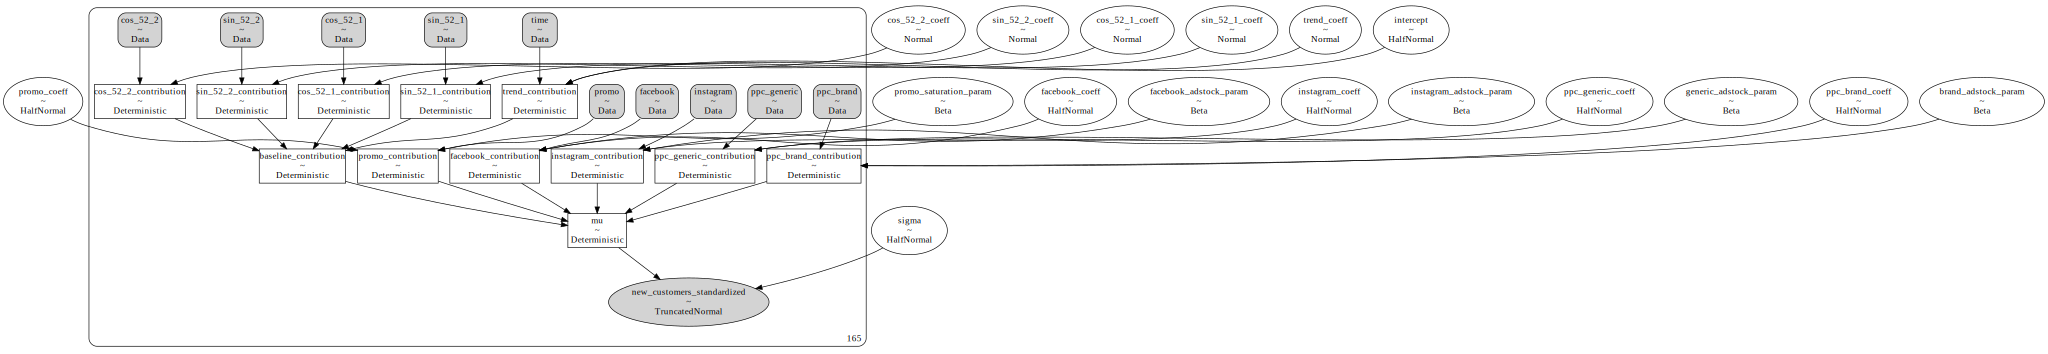

In [31]:
uninformative_coeff_std = 1
halfnormal_std = 0.5

with pymc.Model() as model:
  # standard deviation
  sigma = pymc.HalfNormal("sigma", sigma=uninformative_coeff_std)

  # intercept
  intercept = pymc.HalfNormal("intercept", sigma=uninformative_coeff_std)

  # trend
  trend_coeff = pymc.Normal("trend_coeff", mu=0, sigma=uninformative_coeff_std)
  trend_data = pymc.Data("time", train_df['time_standardized'].to_list())
  trend = pymc.Deterministic(name='trend_contribution', var=intercept + trend_coeff * trend_data)

  # seasonality
  harm_vars = []
  harmonic_cols = [col for col in regressors if ('sin_' in col) | ('cos_' in col )]
  for harmonic_col in harmonic_cols:
    harmonic_col_name = harmonic_col.replace('_standardized', '')
    harm_coeff = pymc.Normal(f"{harmonic_col_name}_coeff", mu=0, sigma=uninformative_coeff_std)
    harm_data = pymc.Data(harmonic_col_name, train_df[harmonic_col].to_list())
    harm_vars.append(pymc.Deterministic(name=f'{harmonic_col_name}_contribution', var=harm_coeff * harm_data))

  baseline = pymc.Deterministic(name='baseline_contribution', var=sum(harm_vars) + trend)

  # promotions
  promo_saturation_param = pymc.Beta(name="promo_saturation_param", alpha=2, beta=8)
  promo_coeff = pymc.HalfNormal('promo_coeff', sigma=halfnormal_std)
  promo_data = pymc.Data("promo", train_df['promo_investment_lag0_standardized'].to_list())
  transformed_promo = root_transformation_pytensor(promo_data, promo_saturation_param)
  promo = pymc.Deterministic(name='promo_contribution', var=promo_coeff * transformed_promo)

  # ppc brand
  ppc_brand_adstock_param = pymc.Beta(name="brand_adstock_param", alpha=8, beta=8)
  ppc_brand_coeff = pymc.HalfNormal('ppc_brand_coeff', sigma=halfnormal_std)
  ppc_brand_data = pymc.Data("ppc_brand", train_df['ppc_brand_investment_lag0_standardized'].to_list())
  transformed_brand =  geometric_adstock_pytensor(ppc_brand_data, ppc_brand_adstock_param)
  ppc_brand = pymc.Deterministic(name='ppc_brand_contribution', var=ppc_brand_coeff * transformed_brand)


  # ppc generic
  ppc_generic_adstock_param =  pymc.Beta(name="generic_adstock_param", alpha=8, beta=2)
  ppc_generic_coeff = pymc.HalfNormal('ppc_generic_coeff',sigma=halfnormal_std)
  ppc_generic_data = pymc.Data("ppc_generic", train_df['ppc_generic_investment_lag3_standardized'].to_list())
  transformed_ppc_generic = geometric_adstock_pytensor(ppc_generic_data, ppc_generic_adstock_param)
  ppc_generic = pymc.Deterministic(name='ppc_generic_contribution', var=ppc_generic_coeff * transformed_ppc_generic)

  # facebook
  ppc_facebook_adstock_param = pymc.Beta(name="facebook_adstock_param", alpha=8, beta=2)
  facebook_coeff = pymc.HalfNormal('facebook_coeff', sigma=halfnormal_std)
  facebook_data = pymc.Data("facebook", train_df['facebook_investment_lag2_standardized'].to_list())
  transformed_facebook = geometric_adstock_pytensor(facebook_data, ppc_facebook_adstock_param)
  facebook = pymc.Deterministic(name='facebook_contribution', var=facebook_coeff * transformed_facebook)

  # instagram
  instagram_adstock_param = pymc.Beta(name="instagram_adstock_param", alpha=8, beta=2)
  instagram_coeff = pymc.HalfNormal('instagram_coeff',sigma=halfnormal_std)
  instagram_data = pymc.Data("instagram", train_df['instagram_investment_lag6_standardized'].to_list())
  transformed_instagram = geometric_adstock_pytensor(instagram_data, instagram_adstock_param)
  instagram = pymc.Deterministic(name='instagram_contribution', var=instagram_coeff *transformed_instagram )

  mu = pymc.Deterministic(name='mu', var=baseline + promo + ppc_brand + ppc_generic + facebook + instagram)


  # target distribution
  pymc.TruncatedNormal(st_target, mu=mu, sigma=sigma, observed=train_df[st_target], shape=baseline.shape, lower=0)

pymc.model_to_graphviz(model=model)

Check Priors 🧐 <br>
This code generates samples from the prior distribution of the model parameters before seeing any data. It helps verify if the chosen priors make sense and produce reasonable values.

Sampling: [brand_adstock_param, cos_52_1_coeff, cos_52_2_coeff, facebook_adstock_param, facebook_coeff, generic_adstock_param, instagram_adstock_param, instagram_coeff, intercept, new_customers_standardized, ppc_brand_coeff, ppc_generic_coeff, promo_coeff, promo_saturation_param, sigma, sin_52_1_coeff, sin_52_2_coeff, trend_coeff]


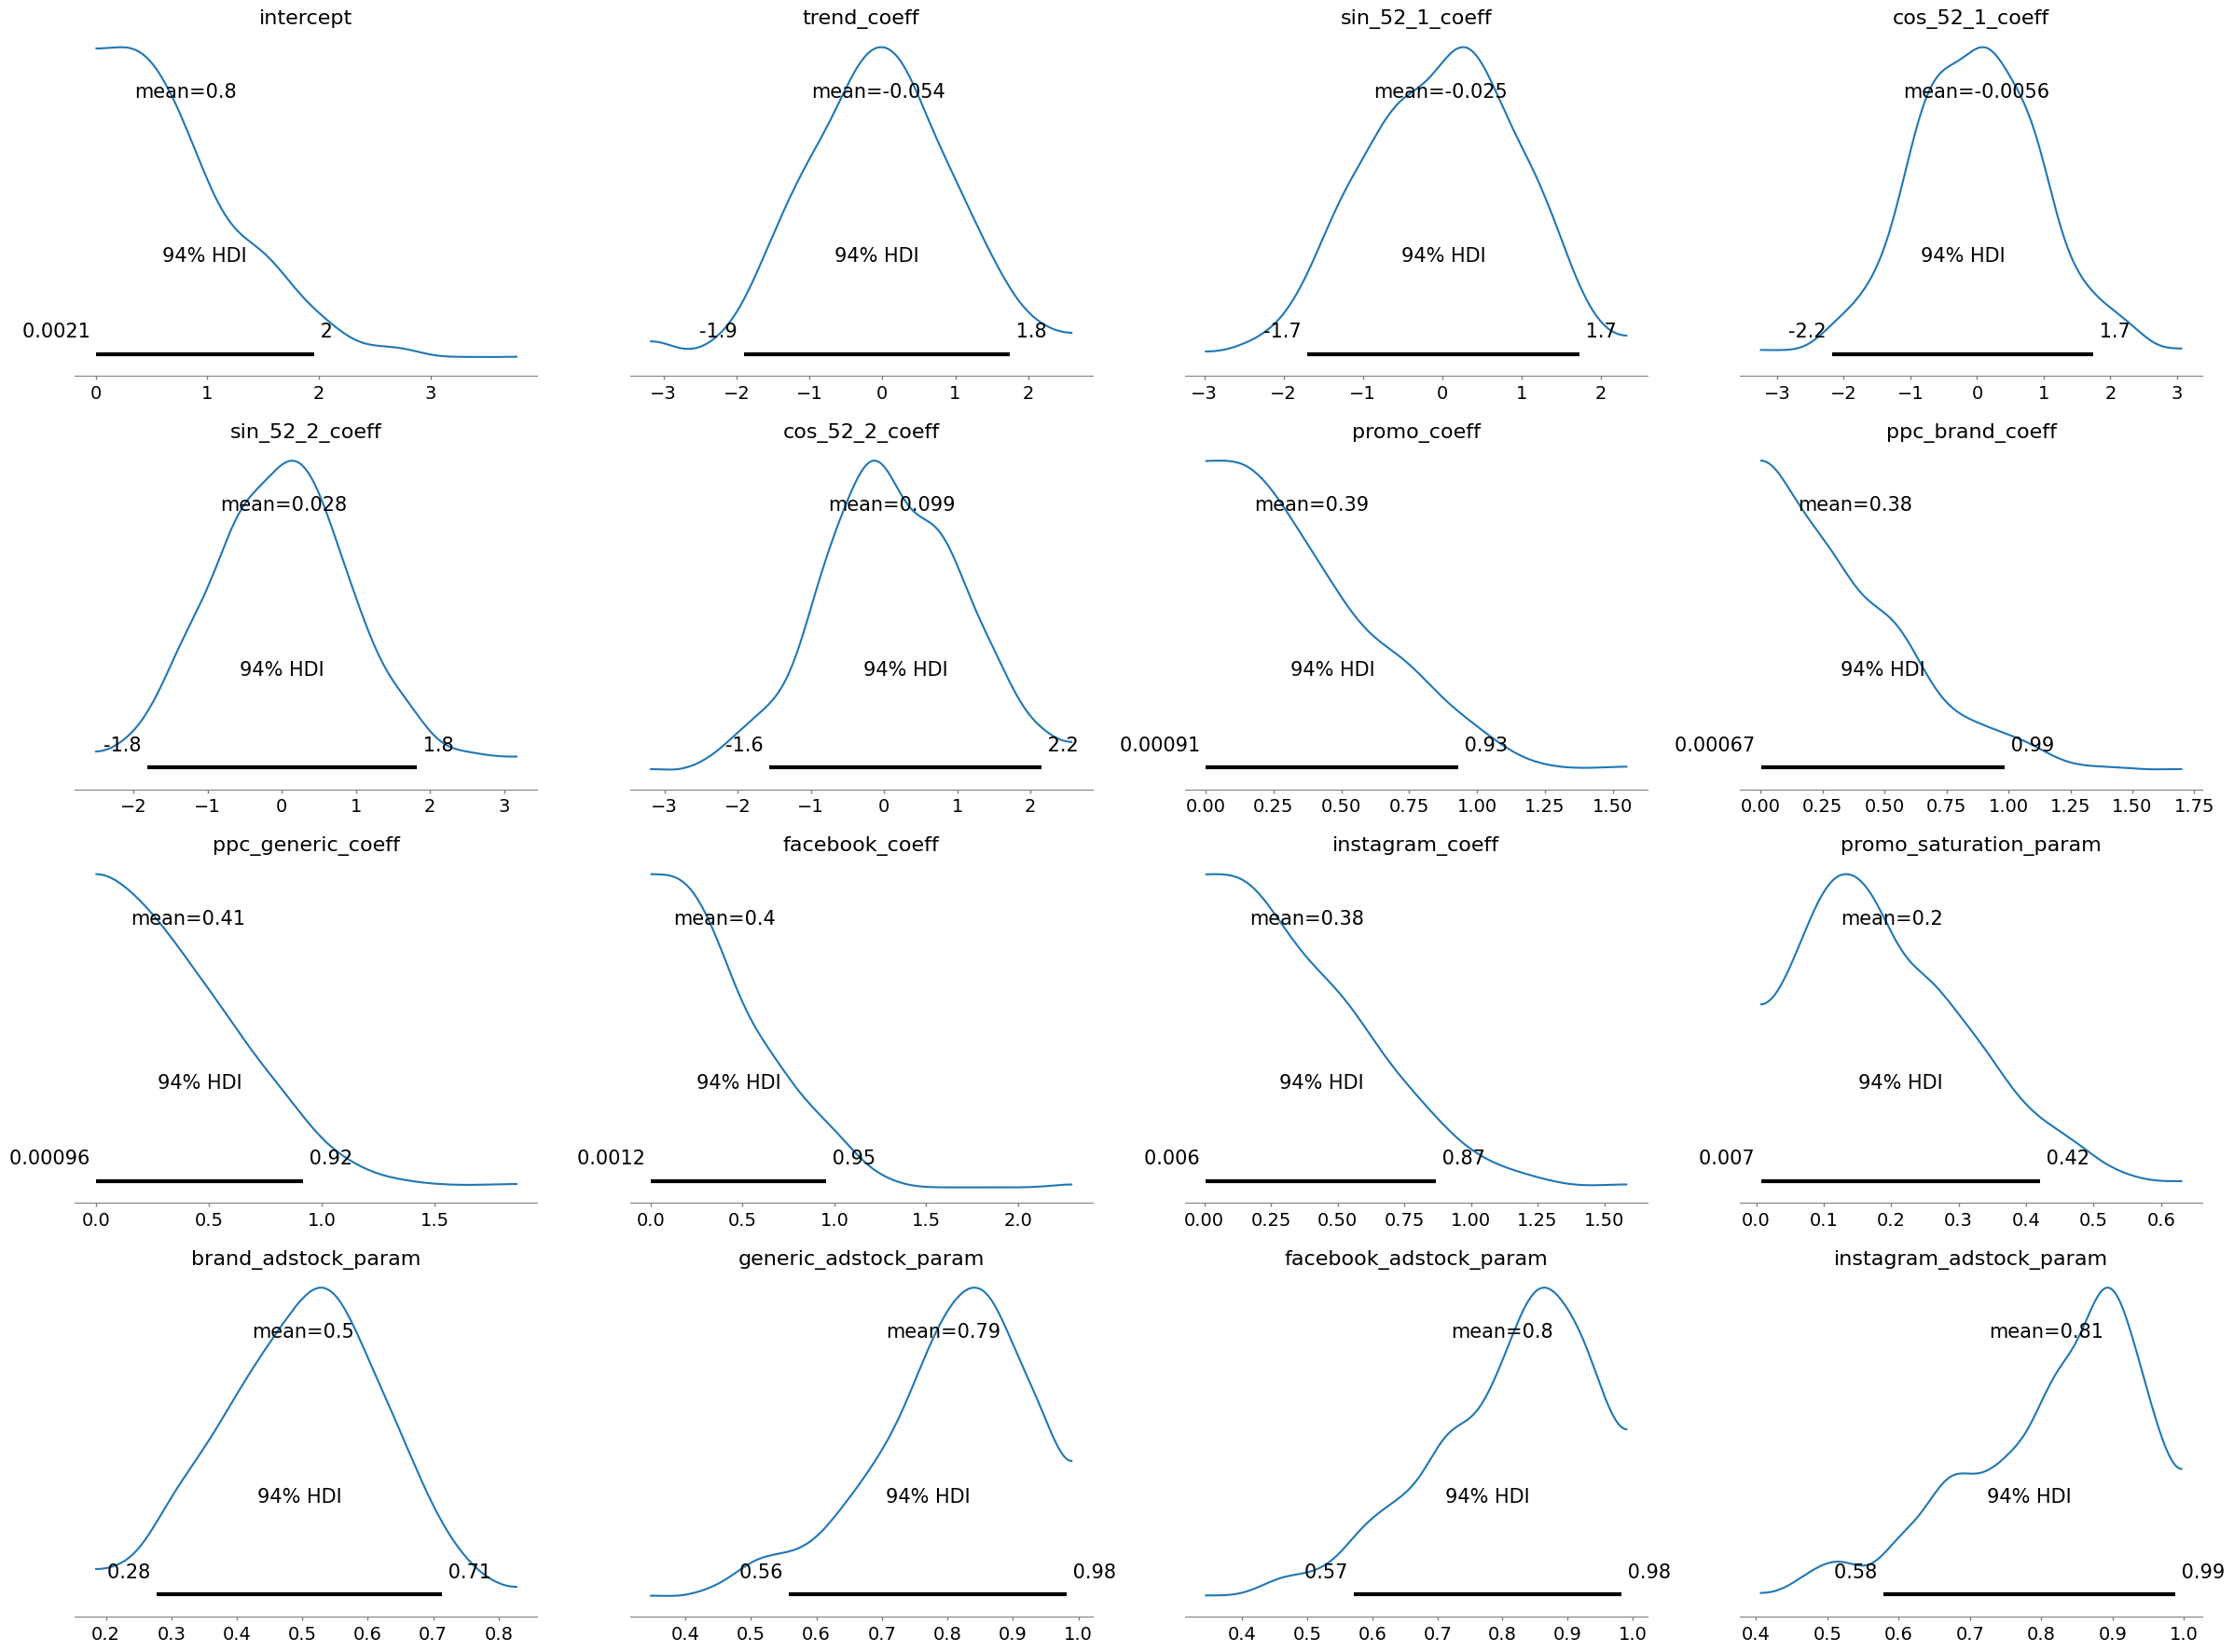

In [32]:
model_coeffs = ['intercept', 'trend_coeff', 'sin_52_1_coeff', 'cos_52_1_coeff', 'sin_52_2_coeff', 'cos_52_2_coeff', 'promo_coeff', 'ppc_brand_coeff', 'ppc_generic_coeff', 'facebook_coeff', 'instagram_coeff']
transformation_params = ['promo_saturation_param', "brand_adstock_param", "generic_adstock_param", "facebook_adstock_param", "instagram_adstock_param"]

random_seed = 123
with model:
  prior_sample = pymc.sample_prior_predictive(random_seed=random_seed)

arviz.plot_posterior(prior_sample, var_names=model_coeffs + transformation_params, group='prior');


Train model 🧘

In [33]:
with model:
    model_trace = pymc.sample(draws=1000, chains=3, random_seed=random_seed,
                              target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sigma, intercept, trend_coeff, sin_52_1_coeff, cos_52_1_coeff, sin_52_2_coeff, cos_52_2_coeff, promo_saturation_param, promo_coeff, brand_adstock_param, ppc_brand_coeff, generic_adstock_param, ppc_generic_coeff, facebook_adstock_param, facebook_coeff, instagram_adstock_param, instagram_coeff]


Output()

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [34]:
model_trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [ ]:
model_trace['posterior']['instagram_coeff']